In [1]:
"""
Code to import the binary files comes from:
https://www.kaggle.com/code/talal92/mit-original-data-preprocessing
and was adjusted to export a csv-Datafile.
The import of all patients/records and convertion to single heartbeats take a long time (~ 2h on my laptop)
"""
#https://www.kaggle.com/code/talal92/mit-original-data-preprocessing
#precrocessed Dataset: https://www.kaggle.com/datasets/talal92/mit-bih-dataset-preprocess-into-heartbeat-python

# Files can be downloaded at:
# https://physionet.org/content/mitdb/1.0.0/

# Importing Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import wfdb                            # Package for loading the ecg and annotation
data = 'mitdb_original_data/'
patients = ['100','101','102','103','104','105','106','107',
           '108','109','111','112','113','114','115','116',
           '117','118','119','121','122','123','124','200',
           '201','202','203','205','207','208','209','210',
           '212','213','214','215','217','219','220','221',
           '222','223','228','230','231','232','233','234']
# Non Beat Symbols
nonbeat = ['[','!',']','x','(',')','p','t','u','`',
           '\'','^','|','~','+','s','T','*','D','=','"','@','Q','?']

# Abnormal Beat Symbols
abnormal = ['L','R','V','/','A','f','F','j','a','E','J','e','S']

# Classification based on AAMI
AAMI = ['N','L','R','B','A','a','j','S','V','r','F','e','j','n','E','f','/','Q','?']

# Normal Beat Symbols
# Normal Heartbeats: N, L, R, B (according to Kaggle)
#      N: Normal beat
#      L: Left bundle branch block beat
#      R: Right bundle branch block beat
#      B: @Helene: ??? Not in list (https://www.physionet.org/files/mitdb/1.0.0/mitdbdir/intro.htm#annotations)

# Supraventricular premature beat: A, a, j, S, e, j, n (according to Kaggle)
#      A: Atrial premature beat
#      a: Aberrated atrial premature beat
#      j: Nodal (junctional) escape beat
#      J: Nodal (junctional) premature beat (@Helene: is "J" right????)
#      S: Supraventricular premature beat
#      e: Atrial escape beat
#      n: @Helene: ??? Not in list (https://www.physionet.org/files/mitdb/1.0.0/mitdbdir/intro.htm#annotations)

# Premature ventricular contraction: V, r, E (according to Kaggle)
#      V: Premature ventricular contraction
#      r: @Helene: ??? Not in list (https://www.physionet.org/files/mitdb/1.0.0/mitdbdir/intro.htm#annotations)
#      E:Ventricular escape beat

# Fusion of ventricular and normal beat: F
#      F: Fusion of ventricular and normal beat

# Unclassifiable Beat:
#      Q: Unclassifiable beat
#      ?: @Helene: ??? Not in list (https://www.physionet.org/files/mitdb/1.0.0/mitdbdir/intro.htm#annotations)
#      f: Fusion of paced and normal beat
#      /: Paced beat

normal = ['N']
dic = {'N': ['N', 'L', 'R', 'B'],
       'S': ['A', 'a', 'j', 'S', 'e', 'j', 'n'],  # <---- There are 2 small "j"s. Should one of them be "J"??? There is also no small "n"
       'V': ['V', 'r', 'E'],
       'F': ['F'],
       'Q': ['Q', '?', 'f', '/'],
      }

# Dict of different recorders: (A, B, C, ...: Different recorders (same type), numbers: Patients)
# https://www.physionet.org/files/mitdb/1.0.0/mitdbdir/intro.htm#annotations "Analog recording and playback"
dic_recorder = {"A": [102, 107, 111, 115, 121],
                "B": [212],
                "C": [203],
                "D": [118, 124, 217],
                "E": [101, 103, 106, 108, 112, 117, 119, 122, 209, 219, 220, 223, 233],
                "F": [104, 109, 123, 205, 207, 210, 215, 221],
                "G": [100, 105, 114, 116, 213, 214, 222, 228],
                "H": [113, 201, 202, 231],
                "I": [200, 230, 232, 234]}

def get_dict_key_from_element(dic, element):
    # Get Dict-Key for corresponding element
    for key, values in dic.items():
        if element in values:
            return key
    return "key doesn't exist"

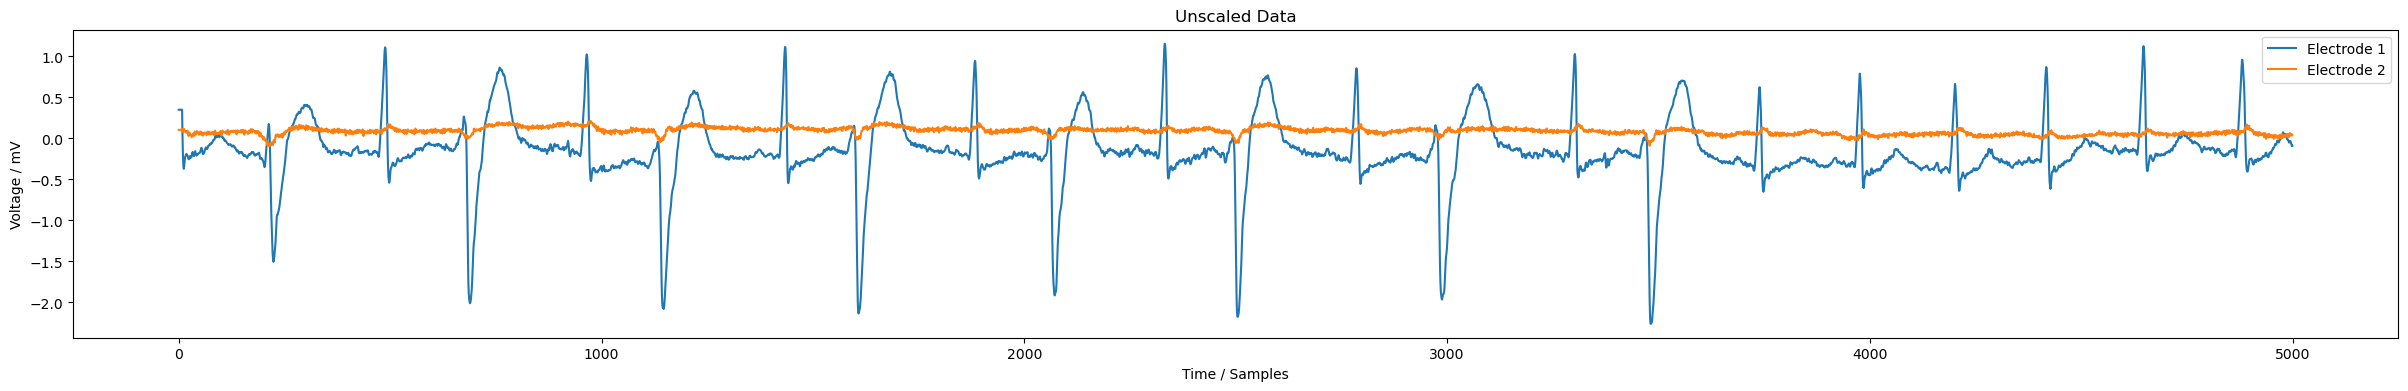

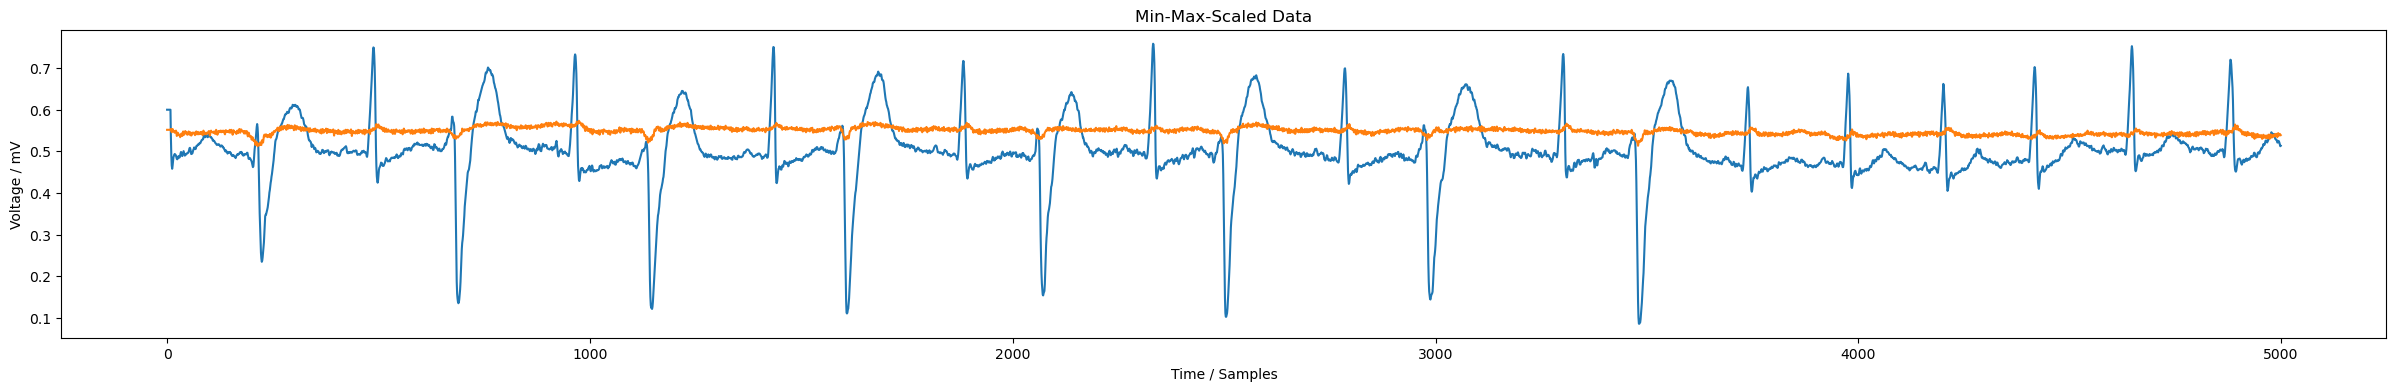

In [3]:
# Overview of the Data:
from wfdb import rdrecord, rdann, processing
from sklearn import preprocessing
record = wfdb.rdrecord(data+'200',smooth_frames=True)

plt.figure(figsize=(30, 4))
plt.title("Unscaled Data")
plt.plot(record.p_signal[:5000,0], label="Electrode 1")
plt.plot(record.p_signal[:5000,1], label="Electrode 2")
plt.xlabel("Time / Samples")
plt.ylabel("Voltage / mV")
plt.legend()


min_max_scaler = preprocessing.MinMaxScaler()
lm = min_max_scaler.fit_transform(record.p_signal[:,0].reshape(-1,1))
lm2 = min_max_scaler.transform(record.p_signal[:,1].reshape(-1,1))
plt.figure(figsize=(30, 4))
plt.title("Min-Max-Scaled Data")
plt.plot(lm[:5000])
plt.plot(lm2[:5000])
plt.xlabel("Time / Samples")
plt.ylabel("Voltage / mV")

plt.show()


In [3]:
# record.adc -> could be ADC-Converter-Values
# record.baseline / record.adc_zero -> 0 V-ADC-Value
# record.comments -> Medication, and other things
#                   (for patient 100: ['69 M 1085 1629 x1', 'Aldomet, Inderal']
#                   (69: Age, M: Gender, 1085: ??, 1629: ??, x1: ??, "Aldomet, Inderal": Medication))
# record.p_signal -> ECG-Data (?) in mV

import inspect
print("Attributes of Class wfdb")
display(inspect.getmembers(record, lambda a:not(inspect.isroutine(a))))

Attributes of Class wfdb


[('__class__', wfdb.io.record.Record),
 ('__dict__',
  {'record_name': '101',
   'n_sig': 2,
   'fs': 360,
   'counter_freq': None,
   'base_counter': None,
   'sig_len': 650000,
   'base_time': None,
   'base_date': None,
   'comments': ['75 F 1011 654 x1', 'Diapres'],
   'sig_name': ['MLII', 'V1'],
   'p_signal': array([[-0.345, -0.16 ],
          [-0.345, -0.16 ],
          [-0.345, -0.16 ],
          ...,
          [-0.295, -0.11 ],
          [-0.29 , -0.11 ],
          [ 0.   ,  0.   ]]),
   'd_signal': None,
   'e_p_signal': None,
   'e_d_signal': None,
   'file_name': ['101.dat', '101.dat'],
   'fmt': ['212', '212'],
   'samps_per_frame': [1, 1],
   'skew': [None, None],
   'byte_offset': [None, None],
   'adc_gain': [200.0, 200.0],
   'baseline': [1024, 1024],
   'units': ['mV', 'mV'],
   'adc_res': [11, 11],
   'adc_zero': [1024, 1024],
   'init_value': [955, 992],
   'checksum': [29832, 19589],
   'block_size': [0, 0]}),
 ('__doc__',
  "\n    The class representing single seg

In [4]:
print("Methods of Class wfdb")
display(inspect.getmembers(record, lambda a:(inspect.isroutine(a))))

Methods of Class wfdb


[('__delattr__',
  <method-wrapper '__delattr__' of Record object at 0x0000027384BFE930>),
 ('__dir__', <function Record.__dir__()>),
 ('__eq__',
  <bound method Record.__eq__ of <wfdb.io.record.Record object at 0x0000027384BFE930>>),
 ('__format__', <function Record.__format__(format_spec, /)>),
 ('__ge__', <method-wrapper '__ge__' of Record object at 0x0000027384BFE930>),
 ('__getattribute__',
  <method-wrapper '__getattribute__' of Record object at 0x0000027384BFE930>),
 ('__getstate__', <function Record.__getstate__()>),
 ('__gt__', <method-wrapper '__gt__' of Record object at 0x0000027384BFE930>),
 ('__init__',
  <bound method Record.__init__ of <wfdb.io.record.Record object at 0x0000027384BFE930>>),
 ('__init_subclass__', <function Record.__init_subclass__>),
 ('__le__', <method-wrapper '__le__' of Record object at 0x0000027384BFE930>),
 ('__lt__', <method-wrapper '__lt__' of Record object at 0x0000027384BFE930>),
 ('__ne__', <method-wrapper '__ne__' of Record object at 0x0000027

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


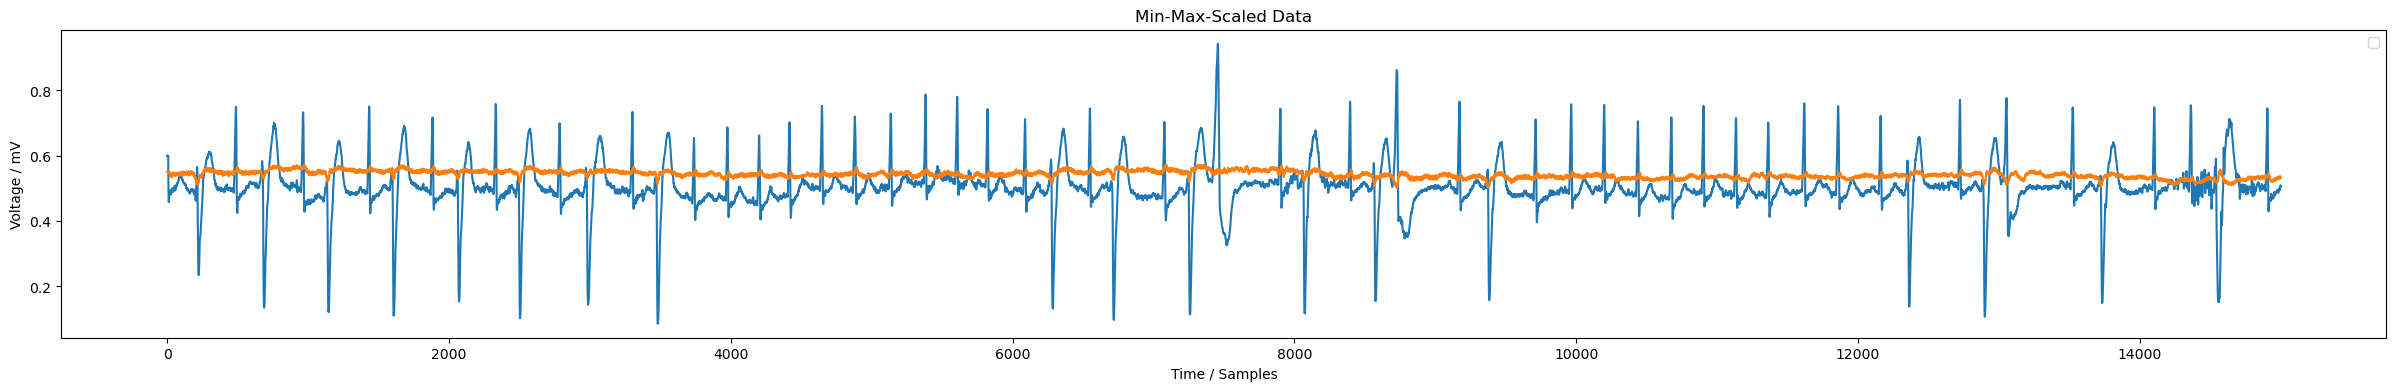

In [57]:
min_max_scaler = preprocessing.MinMaxScaler()
lm = min_max_scaler.fit_transform(record.p_signal[:,0].reshape(-1,1))
lm2 = min_max_scaler.transform(record.p_signal[:,1].reshape(-1,1))
plt.figure(figsize=(30, 4))
plt.title("Min-Max-Scaled Data")
plt.plot(lm[:15000])
plt.plot(lm2[:15000])
plt.xlabel("Time / Samples")
plt.ylabel("Voltage / mV")
plt.legend()


In [ ]:
# changing the window size
from wfdb import rdrecord, rdann, processing
from sklearn import preprocessing

fs = 360
insize = 360 # <--- Thats something we need to check! How to separate the different heartbeats (???)
""" OLD - DONT CHANGE """
y = []
beat_l2 = []
beat_v5 = []
gender = []
age = []
medication = []
record_num = []
device = []
""" OLD - DONT CHANGE """

for num in ['100']: #patients:
    print('record number',num)
    record = wfdb.rdrecord(data+num,smooth_frames=True)
    l2 = preprocessing.scale(np.nan_to_num(record.p_signal[:,0]))
    v5 = preprocessing.scale(np.nan_to_num(record.p_signal[:,1]))

    # Searches for peaks in the signal (probably the "R"s)
    qrs = processing.XQRS(sig = l2,fs = fs)
    qrs.detect()
    peaks = qrs.qrs_inds
    """ OLD - DONT CHANGE """
    comments = record.comments
    medication_patient = comments[1]
    age_patient, gender_patient = comments[0].split()[0:2]
    device_patient = get_dict_key_from_element(dic_recorder, num)

    # for each peak (leave first and last, as this could be no "whole" heartbeats)
    for peak in peaks[1:-1]:
        # Fixed width of the signal with "insize"
        start,end = peak-insize//2, peak+insize//2  # <--- Thats something we need to check! How to separate the different heartbeats (???)

        # Get symbol (class) from the annotation
        ann = wfdb.rdann(data+num,extension='atr', sampfrom = start, sampto = end,
                         return_label_elements=['symbol'])
        annsymbol = ann.symbol """ DONT CHANGE """
        if len(annsymbol) == 1 and annsymbol[0] in AAMI:
            for cl, an in dic.items():
                if annsymbol[0] in an:
                    y.append(cl) # Add target variable (the classes)
                    beat_l2.append(l2[start:end]) # add a single heartbeat (electrode 0)
                    beat_v5.append(v5[start:end]) # add a single heartbeat (electrode 1)
                    age.append(age_patient)
                    gender.append(gender_patient)
                    medication.append(medication_patient)
                    record_num.append(num)
                    device.append(device_patient)

""" OLD - DONT CHANGE """

In [60]:
# changing the window size
from wfdb import rdrecord, rdann, processing
from sklearn import preprocessing

fs = 360
record_length = 630 # <--- Thats something we need to check! How to separate the different heartbeats (???)
percent_left = 0.4
percent_right = 1-percent_left
peak_pos = np.int32(record_length * 0.4)
max_length_left = np.int32(record_length * percent_left)
max_length_right = np.int32(record_length * percent_right)


y = []
beat_l2 = []
beat_v5 = []
gender = []
age = []
medication = []
record_num = []
device = []


for num in patients:
    print('record number',num)
    record = wfdb.rdrecord(data+num,smooth_frames=True)
    l2 = preprocessing.scale(np.nan_to_num(record.p_signal[:,0]))
    v5 = preprocessing.scale(np.nan_to_num(record.p_signal[:,1]))

    # Normalize accross each patient:
    l2 = l2 / np.max(l2)
    v5 = v5 / np.max(v5)

    # Searches for peaks in the signal (probably the "R"s)
    qrs = processing.XQRS(sig = l2,fs = fs)
    qrs.detect()
    peaks = qrs.qrs_inds

    comments = record.comments
    medication_patient = comments[1]
    age_patient, gender_patient = comments[0].split()[0:2]
    device_patient = get_dict_key_from_element(dic_recorder, int(num))

    # for each peak (leave first and last, as this could be no "whole" heartbeats)
    for peak_l, peak, peak_r in zip(peaks[0:-2], peaks[1:-1], peaks[2:]):
        # Fixed width of the signal with "insize"

        # 40% des Signals vor dem Peak
        dleft = np.int32((peak - peak_l) * percent_left)
        if dleft > max_length_left:  dleft = max_length_left

        # 60% des Signals nach dem Peak
        dright = np.int32((peak_r - peak) * percent_right)
        if dright > max_length_right: dright = max_length_right

        start = np.int32(peak - dleft)
        end = np.int32(peak + dright)


        # Get symbol (class) from the annotation
        # Annotation is only at the "Peak"
        ann = wfdb.rdann(data+num,extension='atr', sampfrom = start, sampto = end,
                         return_label_elements=['symbol'])
        annsymbol =ann.symbol
        if len(annsymbol) == 1 and annsymbol[0] in AAMI:
            for cl, an in dic.items():
                if annsymbol[0] in an:
                    y.append(cl) # Add target variable (the classes)

                    # Stellt sicher, dass sich der Peak immer an der selben Position befindet!
                    l2_sig = np.zeros(record_length)
                    l2_sig[peak_pos-dleft:peak_pos] = l2[start:peak]
                    l2_sig[peak_pos:peak_pos+dright] = l2[peak:end]

                    # Stellt sicher, dass sich der Peak immer an der selben Position befindet!
                    v5_sig = np.zeros(record_length)
                    v5_sig[peak_pos-dleft:peak_pos] = v5[start:peak]
                    v5_sig[peak_pos:peak_pos+dright] = v5[peak:end]

                    beat_l2.append(l2_sig[::2]) # add a single heartbeat (electrode 0)
                    beat_v5.append(v5_sig[::2]) # add a single heartbeat (electrode 1)
                    age.append(age_patient)
                    gender.append(gender_patient)
                    medication.append(medication_patient)
                    record_num.append(num)
                    device.append(device_patient)



record number 100
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 101
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 102
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 103
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 104
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Running QRS detection...
QRS detection complete.
record number 105
Learning initial signal parameters...
Found 8 beats during learning. Initializing using learned parameters
Runni

In [44]:
48*26/60

20.8

longest: 315


(105416, 315)

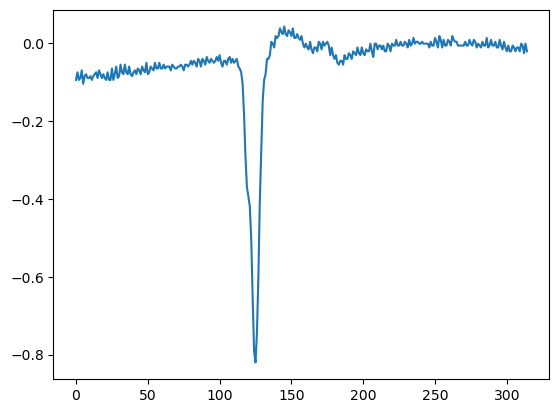

In [69]:
beat = np.array(beat_v5)

print(f"longest: {np.sum(beat!=0, axis=1).max()}")
i_longest = np.sum(beat!=0, axis=1).argmax()

plt.plot(beat[i_longest])
beat.shape

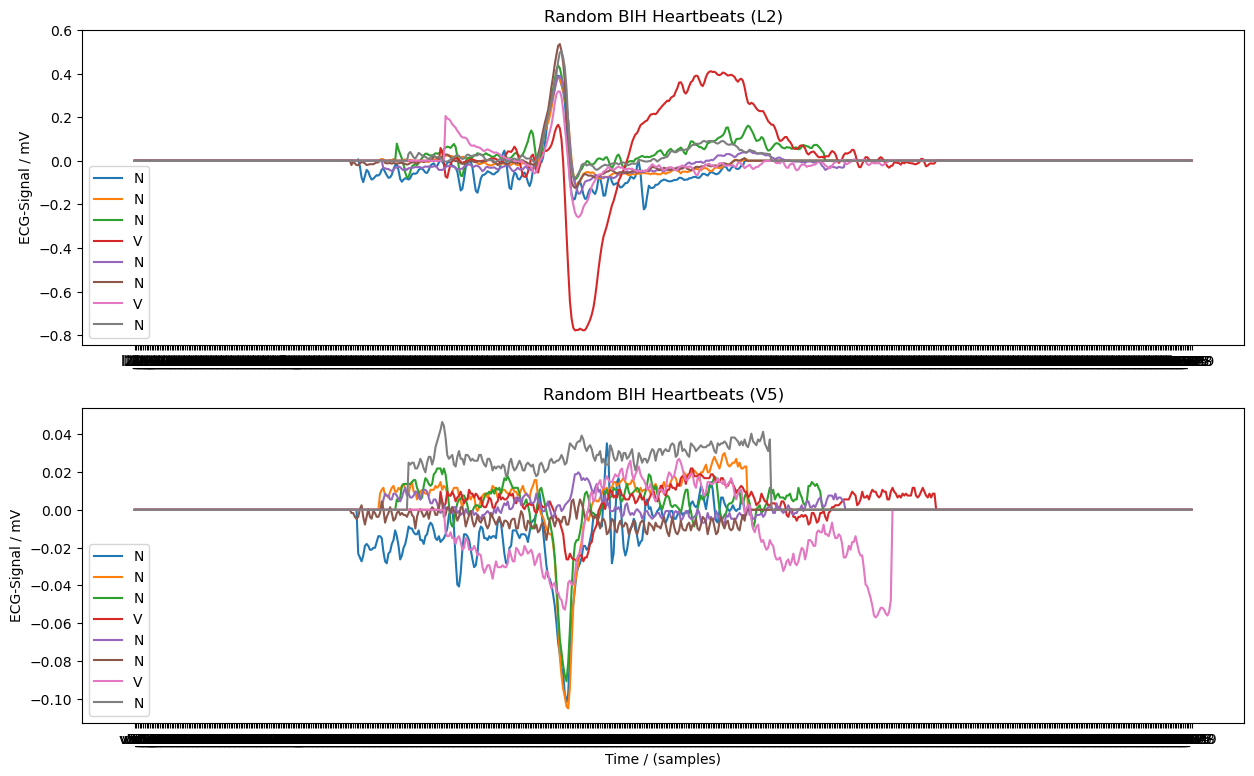

In [54]:
# Plot random signals
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,9))
for idx in np.random.randint(df_l2.shape[0], size=8):
    ax1.plot(df_l2.iloc[idx, :], label=y[idx])
    ax2.plot(df_v5.iloc[idx, :], label=y[idx])
ax1.set_title("Random BIH Heartbeats (L2)")
ax1.set_ylabel("ECG-Signal / mV")
ax1.legend()

ax2.set_title("Random BIH Heartbeats (V5)")
ax2.set_xlabel("Time / (samples)")
ax2.set_ylabel("ECG-Signal / mV")
ax2.legend()

In [66]:
df = pd.DataFrame({"record": record_num,
                   "age": age,
                   "gender": gender,
                   "medication": medication,
                   "device": device,
                   "class": y
                  })

colnames = ["l2_" + str(i) for i in np.arange(len(beat_l2[0]))]
df_l2 = pd.DataFrame(data=beat_l2, columns=colnames)
colnames = ["v5_" + str(i) for i in np.arange(len(beat_v5[0]))]
df_v5 = pd.DataFrame(data=beat_v5, columns=colnames)

df_join = df.join(df_l2)
df_join = df_join.join(df_v5)
df_join.head()

,record,age,gender,medication,device,class,l2_0,l2_1,l2_2,l2_3,...,v5_305,v5_306,v5_307,v5_308,v5_309,v5_310,v5_311,v5_312,v5_313,v5_314
0,100,69,M,"Aldomet, Inderal",G,N,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100,69,M,"Aldomet, Inderal",G,N,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100,69,M,"Aldomet, Inderal",G,N,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100,69,M,"Aldomet, Inderal",G,N,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100,69,M,"Aldomet, Inderal",G,N,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
# Save Dataframe

df_join.to_pickle("MIT_Heartbeat_original")
df_join.shape

(105416, 636)

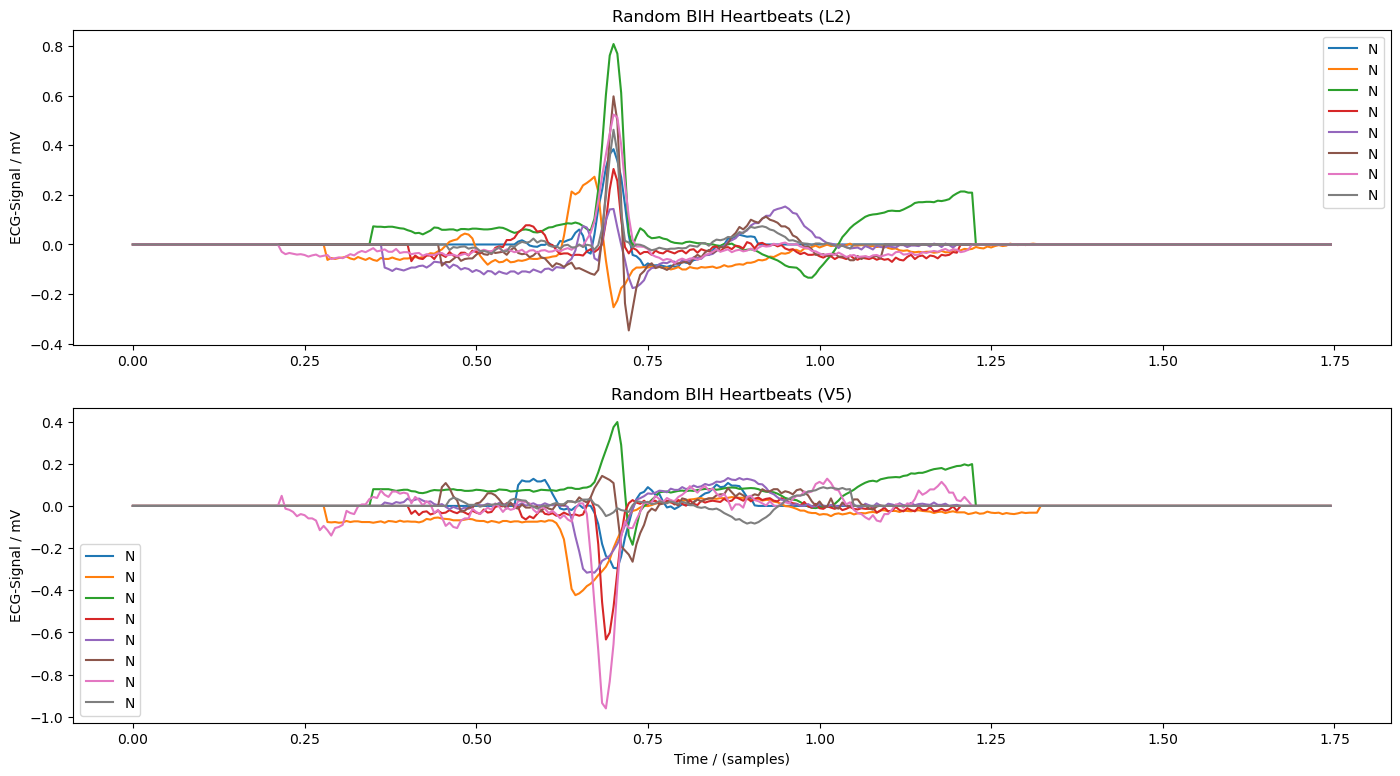

In [103]:
# Plot random signals
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(17,9))
for idx in np.random.randint(df_l2.shape[0], size=8):
    ax1.plot(np.arange(315)/180, df_l2.iloc[idx, :], label=y[idx])
    ax2.plot(np.arange(315)/180, df_v5.iloc[idx, :], label=y[idx])
ax1.set_title("Random BIH Heartbeats (L2)")
ax1.set_ylabel("ECG-Signal / mV")
ax1.legend()

ax2.set_title("Random BIH Heartbeats (V5)")
ax2.set_xlabel("Time / (samples)")
ax2.set_ylabel("ECG-Signal / mV")
ax2.legend()

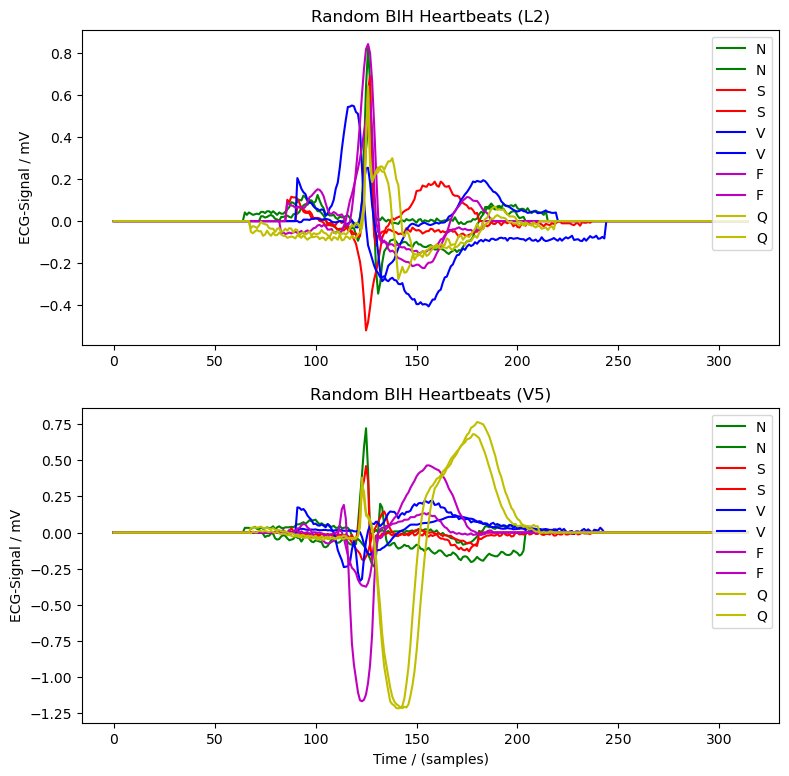

In [104]:
# Plot random signals

i_N = np.where(np.char.compare_chararrays(y, 'N', cmp='==', rstrip=True))[0]
i_S = np.where(np.char.compare_chararrays(y, 'S', cmp='==', rstrip=True))[0]
i_V = np.where(np.char.compare_chararrays(y, 'V', cmp='==', rstrip=True))[0]
i_F = np.where(np.char.compare_chararrays(y, 'F', cmp='==', rstrip=True))[0]
i_Q = np.where(np.char.compare_chararrays(y, 'Q', cmp='==', rstrip=True))[0]

colors = ['g', 'r', 'b', 'm', 'y']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(9,9))
for i_cat, cat in enumerate(["N", "S", "V", "F", "Q"]):
      i = np.where(np.char.compare_chararrays(y, cat, cmp='==', rstrip=True))[0]
      color = colors[i_cat]
      if len(i) > 1:
            for  idx in np.random.randint(np.shape(i), size=2):
                  ax1.plot(np.arange(0, len(df_l2.iloc[0,:])), df_l2.iloc[i[idx], :], '-', color=color, label=y[i[idx]])
                  ax2.plot(np.arange(0, len(df_l2.iloc[0,:])), df_v5.iloc[i[idx], :], '-', color=color, label=y[i[idx]])



ax1.set_title("Random BIH Heartbeats (L2)")
ax1.set_ylabel("ECG-Signal / mV")
ax1.legend()

ax2.set_title("Random BIH Heartbeats (V5)")
ax2.set_xlabel("Time / (samples)")
ax2.set_ylabel("ECG-Signal / mV")
ax2.legend()


In [108]:
value_counts = df_join['class'].value_counts()
df_join["class"].nunique(dropna=False)
display(value_counts)

class
N    87887
Q     7894
V     6165
S     2760
F      710
Name: count, dtype: int64